In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
from scipy import integrate
from scipy import interpolate
from scipy.integrate import odeint
from nbodykit.lab import *
from nbodykit import setup_logging
from nbodykit.io import bigfile
import matplotlib.pyplot as plt

cosmo = cosmology.Planck15

    
seedlist= []
for i in range(1991,1995+1):
    seedlist.append(str(i))

#ppplist = ['ppp0008', 'ppp002', 'ppp003', 'ppp007']
#mmmlist = ['mmm0008', 'mmm002', 'mmm003', 'mmm007']

#ppplist = ['iso', 'ppp0004', 'ppp0008', 'ppp001', 'ppp002', 'ppp003', 'ppp007']
#ppplist = ['iso', 'ppp0004', 'ppp0008', 'ppp001', 'ppp002', 'ppp003', 'ppp007']
#mmmlist = ['mmm0004', 'mmm0008', 'mmm001', 'mmm002', 'mmm003', 'mmm007', 'iso']
#mmmlist = ['mmm007', 'mmm003', 'mmm002', 'mmm001', 'mmm0008',  'mmm0004']
#isolist = mmmlist + ppplist

mmplist = ['iso', 'mmp003', 'mmp005']
ppmlist = ['iso', 'ppm003', 'ppm005']


#lambdaz_array = np.array([0.01, 0.02, 0.05, 0.08, 0.1])
#deltabL_array = 3*np.array([0.008, 0.02, 0.03, 0.07 ])

lambdaz_array = np.array([0., 0.03, 0.05])
#deltabL_array = 3*np.array([0., 0.004, 0.008, 0.01, 0.02, 0.03, 0.07])
deltabL_array = 3*np.array([-0.07, -0.03 ,-0.02, -0.01, -0.008, -0.004 ,0., 0.004, 0.008, 0.01, 0.02, 0.03, 0.07])
#deltabL_array = 3*np.array([-0.004, -0.008, -0.01, -0.02, -0.03, -0.07, 0.])
#deltabL_array = 3*np.array([-0.004, -0.008, -0.01, -0.02, -0.03, -0.07, 0., 0.004, 0.008, 0.01, 0.02, 0.03, 0.07])


force = 'treepm2048'
box = 1000

In [3]:
def a_ratio(z, kind):
    scale_a = 1./(1+z)
    data = np.loadtxt(f'/home/yinli/csit/analysis/Aniss/Aniss_planck2015_{kind}_z200')
    delta_ax = interpolate.interp1d(data[:,0], data[:,1], kind="cubic")
    delta_ay = interpolate.interp1d(data[:,0], data[:,2], kind="cubic")
    delta_az = interpolate.interp1d(data[:,0], data[:,3], kind="cubic")
    delta_a = np.zeros(3)
    delta_a[0] = delta_ax(scale_a)
    delta_a[1] = delta_ay(scale_a)
    delta_a[2] = delta_az(scale_a)
    return 1 + delta_a

In [4]:
halo_cat = {}
for seed in seedlist:
#    for kind in isolist:
#        halo_cat[kind+'_'+seed] = bigfile.BigFile(f'/mnt/sdceph/users/yinli/csit/planck2015/1000/{seed}/{kind}/ASMTH6/halos/')
    for kind in mmplist:
        halo_cat[kind+'_'+seed] = bigfile.BigFile(f'/mnt/sdceph/users/yinli/csit/planck2015/1000/{seed}/{kind}/ASMTH6/halos/')
    for kind in ppmlist:
        halo_cat[kind+'_'+seed] = bigfile.BigFile(f'/mnt/sdceph/users/yinli/csit/planck2015/1000/{seed}/{kind}/ASMTH6/halos/')

In [5]:
nbin = 12
bins = np.logspace(12.5, 15, nbin)


massbin = []
for i in range(1, len(bins)):
    massbin.append( np.sqrt(bins[i-1]*bins[i]) ) 
    

mass_array = {}
for seed in seedlist:
#    for kind in isolist:
#        mass_array[kind+'_'+seed] = halo_cat[kind+'_'+seed][['Mass']].asarray()
    for kind in mmplist:
        mass_array[kind+'_'+seed] = halo_cat[kind+'_'+seed][['Mass']].asarray()
    for kind in ppmlist:
        mass_array[kind+'_'+seed] = halo_cat[kind+'_'+seed][['Mass']].asarray()

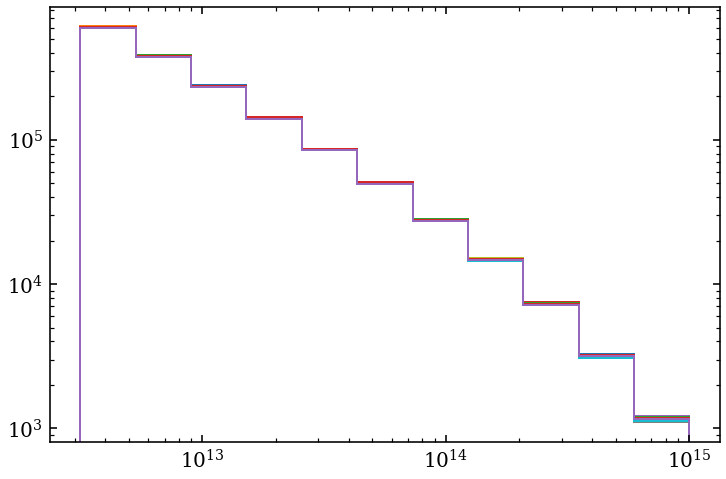

In [6]:
N_array = {} #Number of halos with fixed comoving volume
for seed in seedlist:
#    for kind in isolist:
#        N_array[kind+'_'+seed] = plt.hist(mass_array[kind+'_'+seed][:-1], bins,
#                                            weights=np.full(mass_array[kind+'_'+seed][:-1].shape, 1),
#                                            histtype='step')
    for kind in mmplist:
        N_array[kind+'_'+seed] = plt.hist(mass_array[kind+'_'+seed][:-1], bins,
                                            weights=np.full(mass_array[kind+'_'+seed][:-1].shape, 1),
                                            histtype='step')
    for kind in ppmlist:
        if kind!='iso':
            N_array[kind+'_'+seed] = plt.hist(mass_array[kind+'_'+seed][:-1], bins,
                                            weights=np.full(mass_array[kind+'_'+seed][:-1].shape, 1),
                                            histtype='step')

plt.xscale('log')
plt.yscale('log')

In [7]:
N_array['iso_1991'][1]

array([3.16227766e+12, 5.33669923e+12, 9.00628020e+12, 1.51991108e+13,
       2.56502091e+13, 4.32876128e+13, 7.30527154e+13, 1.23284674e+14,
       2.08056754e+14, 3.51119173e+14, 5.92553098e+14, 1.00000000e+15])

In [8]:
N_sum = {}

#N_sum['iso'] = N_array['iso_1991'][0] + N_array['iso_1992'][0] 
'''
for kind in isolist:
    N_sum[kind] = np.zeros(nbin-1)
    for seed in seedlist:
        N_sum[kind] += N_array[kind+'_'+seed][0]
'''    
for kind in mmplist:
    N_sum[kind] = np.zeros(nbin-1)
    for seed in seedlist:
        N_sum[kind] += N_array[kind+'_'+seed][0]

for kind in ppmlist:
    N_sum[kind] = np.zeros(nbin-1)
    for seed in seedlist:
        N_sum[kind] += N_array[kind+'_'+seed][0]

In [9]:
delta_h = {}

#delta_h['iso'] = np.zeros((len(isolist),nbin-1))
delta_h['mmp'] = np.zeros((len(mmplist),nbin-1))
delta_h['ppm'] = np.zeros((len(ppmlist),nbin-1))

count = 0
#for kind in isolist:
#    delta_h['iso'][count] = (N_sum[kind] - N_sum['iso'])/N_sum['iso']
#    count += 1
    
count = 0
for kind in mmplist:
    delta_h['mmp'][count] = (N_sum[kind] - N_sum['iso'])/N_sum['iso']
    count += 1
    
count = 0
for kind in ppmlist:
    delta_h['ppm'][count] = (N_sum[kind] - N_sum['iso'])/N_sum['iso']
    count += 1

In [17]:
num_bn = 4
num_bs = 3
bn_array = {}
#bn_array['iso'] = np.zeros((nbin-1, num_bn+1 ))
bn_array['mmp'] = np.zeros((nbin-1, num_bs+1 ))
bn_array['ppm'] = np.zeros((nbin-1, num_bs+1 ))


#for i in range(nbin-1):
#    bn_array['iso'][i] =  np.polyfit(deltabL_array, delta_h['iso'][:,i]  ,num_bn)
    
for i in range(nbin-1):
    bn_array['mmp'][i] =  np.polyfit(lambdaz_array, delta_h['mmp'][:,i]  ,num_bs)
    bn_array['ppm'][i] =  np.polyfit(lambdaz_array, delta_h['ppm'][:,i]  ,num_bs)

/home/yinli/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/yinli/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/yinli/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/yinli/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/yinli/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/yinli/anaconda/lib/python3.7/site-packages/IPython/core/int

In [18]:
bn_array['mmp'][:,-2]

array([ 0.00893361,  0.03824258, -0.04522553,  0.01167327,  0.04724346,
       -0.02025775,  0.01906835, -0.019108  , -0.1302416 ,  0.04084815,
        0.06773761])

In [19]:
bn_array['ppm'][:,-3]

array([-2.84323632, -2.86017115, -3.00929352, -3.05672397, -2.96830279,
       -3.20228661, -2.85989224, -3.52114597, -3.52946459, -3.21497021,
       -1.3968356 ])

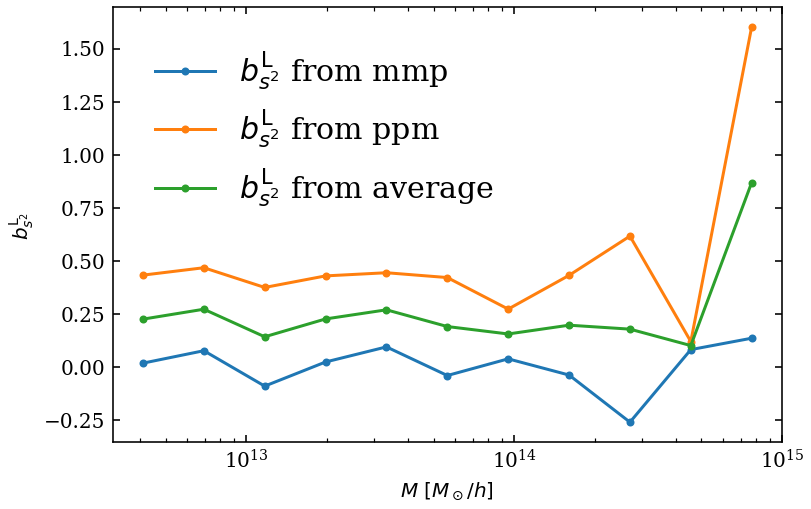

In [21]:
plt.plot(massbin, 2*bn_array['mmp'][:,-2], marker='.',label=r"$b^{\rm L}_{s^2}$ from mmp" )
plt.plot(massbin, 2*bn_array['ppm'][:,-2], marker='.',label=r"$b^{\rm L}_{s^2}$ from ppm" )
plt.plot(massbin, bn_array['mmp'][:,-2]+bn_array['ppm'][:,-2], marker='.',label=r"$b^{\rm L}_{s^2}$ from average" )


plt.xlabel(r"$M\ [M_\odot/h]$")
plt.ylabel(r"$b_{s^2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/bias/bLs2_poly.pdf')

In [14]:
#bn_array['iso'][:,-2]

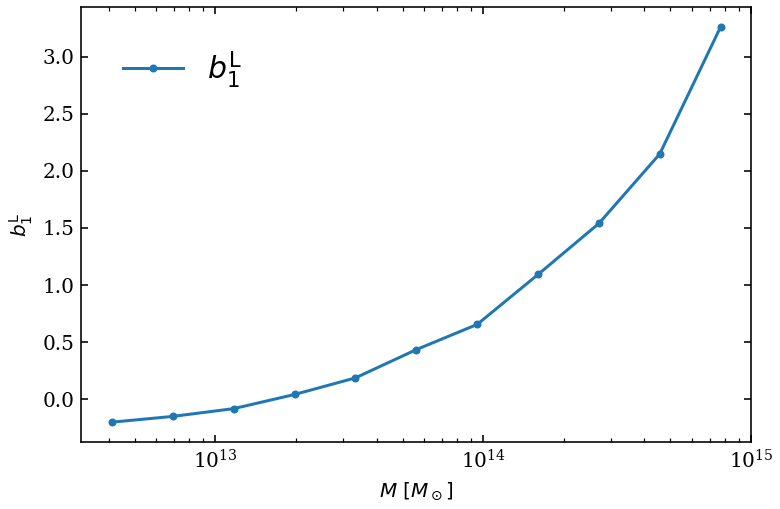

In [61]:
plt.plot(massbin, bn_array['iso'][:,-2], marker='.',label=r"$b^{\rm L}_{1}$" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_poly.pdf')

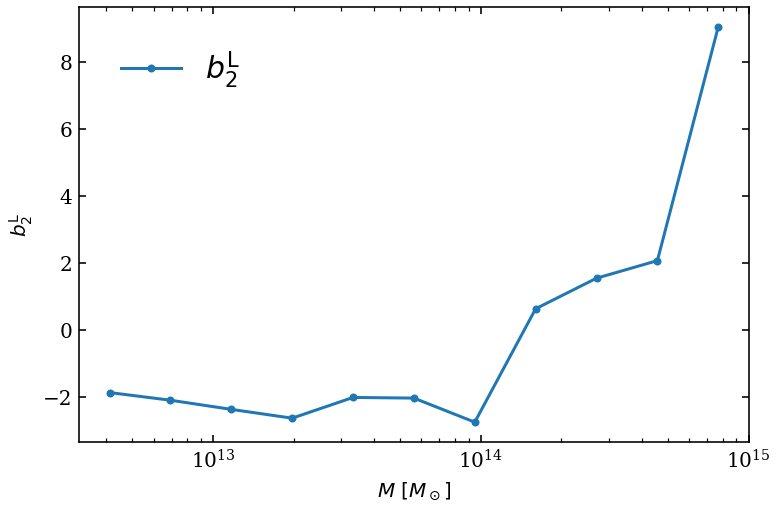

In [62]:
plt.plot(massbin, 2+2*bn_array['iso'][:,-3], marker='.',label=r"$b^{\rm L}_{2}$" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{2}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL2_poly.pdf')

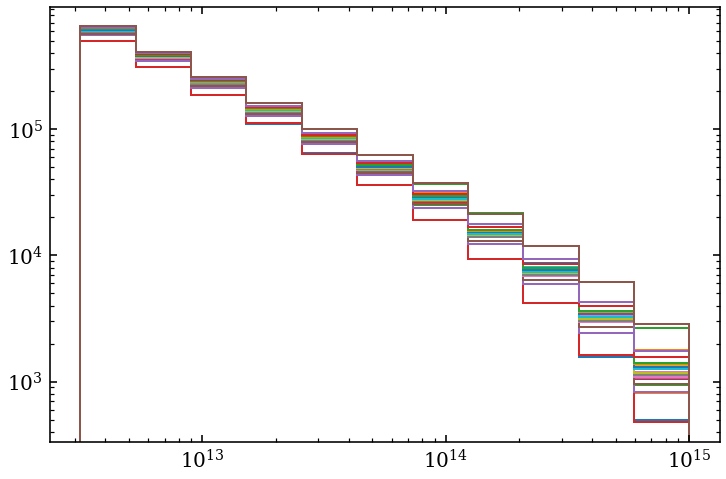

In [63]:
n_array = {} #Number of halos with fixed comoving volume
for seed in seedlist:
    for kind in isolist:
        n_array[kind+'_'+seed] = plt.hist(mass_array[kind+'_'+seed][:-1], bins,
                                            weights=np.full(mass_array[kind+'_'+seed][:-1].shape, 1./a_ratio(0., kind).prod()),
                                            histtype='step')

plt.xscale('log')
plt.yscale('log')

In [64]:
n_sum = {}

#N_sum['iso'] = N_array['iso_1991'][0] + N_array['iso_1992'][0] 

for kind in isolist:
    n_sum[kind] = np.zeros(nbin-1)
    for seed in seedlist:
        n_sum[kind] += n_array[kind+'_'+seed][0]

In [65]:
delta_hE = {}

delta_hE['iso'] = np.zeros((len(isolist),nbin-1))

count = 0
for kind in isolist:
    delta_hE['iso'][count] = (n_sum[kind] - n_sum['iso'])/n_sum['iso']
    count += 1

In [66]:
for kind in isolist:
    if kind==isolist[0]:
        deltabE_array = np.array([1./a_ratio(0.,kind).prod() - 1.])
    else:
        deltabE_array = np.append(deltabE_array, 1./a_ratio(0.,kind).prod() - 1.)
print(deltabE_array)

[-0.17915693 -0.08386365 -0.05721901 -0.0292961  -0.02355084 -0.01189334
  0.          0.01212684  0.02448435  0.03075474  0.06306008  0.09703601
  0.25225271]


In [67]:
np.append(deltabE_array, 5)
print(deltabE_array)

[-0.17915693 -0.08386365 -0.05721901 -0.0292961  -0.02355084 -0.01189334
  0.          0.01212684  0.02448435  0.03075474  0.06306008  0.09703601
  0.25225271]


In [68]:
#num_bn = 3
#num_bs = 2
bEn_array = {}
bEn_array['iso'] = np.zeros((nbin-1, num_bn+1 ))

for i in range(nbin-1):
    bEn_array['iso'][i] =  np.polyfit(deltabE_array, delta_hE['iso'][:,i]  ,num_bn)

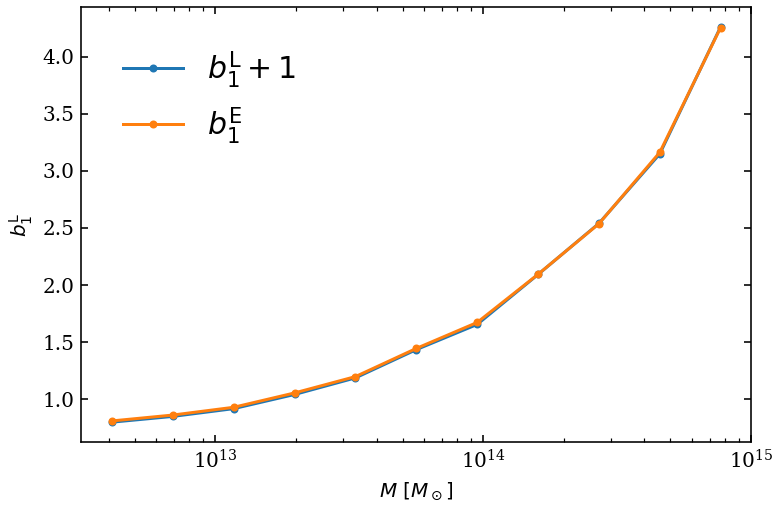

In [69]:
plt.plot(massbin, bn_array['iso'][:,-2]+1, marker='.',label=r"$b^{\rm L}_{1}+1$" )
plt.plot(massbin, bEn_array['iso'][:,-2], marker='.',label=r"$b^{\rm E}_{1}$" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/b1_poly.pdf')

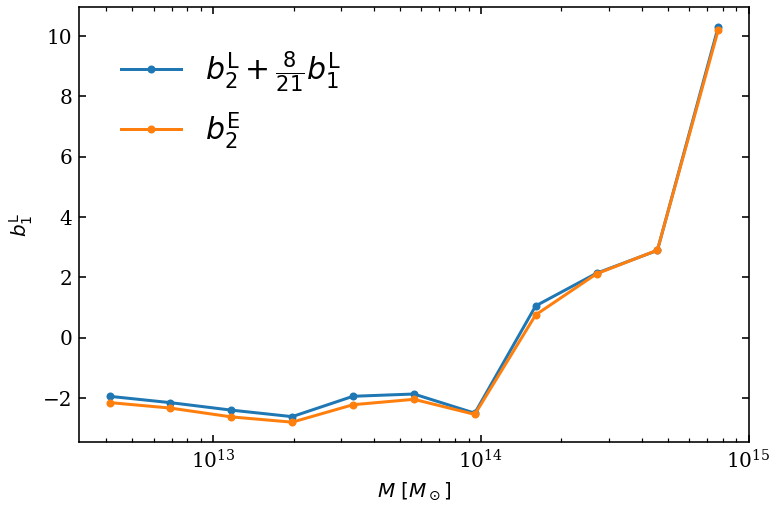

In [70]:
plt.plot(massbin, 2+2*bn_array['iso'][:,-3] + 8.*bn_array['iso'][:,-2]/21, marker='.',label=r"$b^{\rm L}_{2} + \frac{8}{21}b^{\rm L}_{1}$" )
plt.plot(massbin, 2+2*bEn_array['iso'][:,-3], marker='.',label=r"$b^{\rm E}_{2}$" )


plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
#plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/b2_2poly.pdf')

In [71]:
bL1_diff = np.loadtxt('bL1_ppp001.txt')
bL1_diff_2 = np.loadtxt('bL1_ppp007.txt')

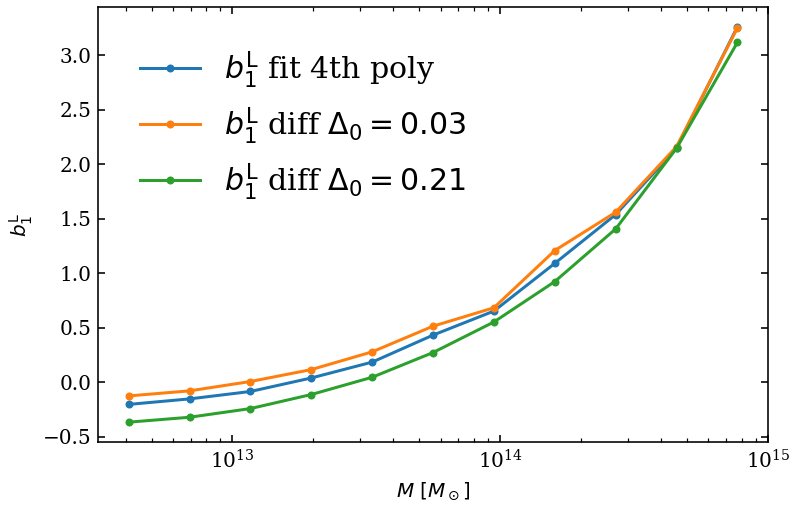

In [72]:
plt.plot(massbin, bn_array['iso'][:,-2], marker='.',label=r"$b^{\rm L}_{1}$ fit 4th poly" )
plt.plot(massbin, bL1_diff, marker='.',label=r"$b^{\rm L}_{1}$ diff $\Delta_0=0.03$" )
plt.plot(massbin, bL1_diff_2, marker='.',label=r"$b^{\rm L}_{1}$ diff $\Delta_0=0.21$" )

plt.xlabel(r"$M\ [M_\odot]$")
plt.ylabel(r"$b_{1}^{\rm L}$ ")
plt.xscale('log')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=1, fontsize=15)
plt.savefig('/home/yinli/csit/analysis/halos/planck2015/1000/bL1_comp4.pdf')